#### Kaufmann 2017 abridged QC

**Objective**: Run QC steps without normalisation/UMAP for Kaufmann 2017 data

- **Developed by**: Mairi McClean
- **Affiliation**: Institute of Computational Biology, Helmholtz Zentrum Munich
- **v230308**

In [1]:
import anndata
import logging
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scrublet as scr
import matplotlib.pyplot as plt
import pybiomart as biomart
from matplotlib import colors
from matplotlib import rcParams

#### Log file and figure output settings

In [2]:
%matplotlib inline

sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')

-----
anndata     0.9.1
scanpy      1.9.3
-----
CoreFoundation      NA
Foundation          NA
PIL                 9.5.0
PyObjCTools         NA
anyio               NA
appnope             0.1.3
asttokens           NA
attr                23.1.0
babel               2.12.1
backcall            0.2.0
certifi             2023.05.07
cffi                1.15.1
charset_normalizer  3.1.0
cloudpickle         2.2.1
colorama            0.4.6
comm                0.1.3
cycler              0.10.0
cython_runtime      NA
cytoolz             0.12.0
dask                2023.5.1
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.1
defusedxml          0.7.1
executing           1.2.0
fastjsonschema      NA
future              0.18.3
h5py                3.8.0
idna                3.4
igraph              0.10.4
importlib_resources NA
ipykernel           6.23.1
jedi                0.18.2
jinja2              3.1.2
joblib              1.2.0
json5               NA
jsonschema          4.17.3
j

### Read in datasets

In [3]:
# Separate mtx files given for control and infected cells, but only 1 gene and 1 barcodes files were given; will read in in separate commands

adata_pbs = sc.read_10x_mtx('/Volumes/Expansion/data_lake/inbox/tb_cc/raw_data_objects/mice/kaufmann2017/pbs/')
adata_pbs

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


AnnData object with n_obs × n_vars = 737280 × 27998
    var: 'gene_ids'

In [4]:
adata_pbs.obs

Empty DataFrame
Columns: []
Index: [AAACCTGAGAAACCAT-1, AAACCTGAGAAACCGC-1, AAACCTGAGAAACCTA-1, AAACCTGAGAAACGAG-1, AAACCTGAGAAACGCC-1, AAACCTGAGAAAGTGG-1, AAACCTGAGAACAACT-1, AAACCTGAGAACAATC-1, AAACCTGAGAACTCGG-1, AAACCTGAGAACTGTA-1, AAACCTGAGAAGAAGC-1, AAACCTGAGAAGATTC-1, AAACCTGAGAAGCCCA-1, AAACCTGAGAAGGACA-1, AAACCTGAGAAGGCCT-1, AAACCTGAGAAGGGTA-1, AAACCTGAGAAGGTGA-1, AAACCTGAGAAGGTTT-1, AAACCTGAGAATAGGG-1, AAACCTGAGAATCTCC-1, AAACCTGAGAATGTGT-1, AAACCTGAGAATGTTG-1, AAACCTGAGAATTCCC-1, AAACCTGAGAATTGTG-1, AAACCTGAGACAAAGG-1, AAACCTGAGACAAGCC-1, AAACCTGAGACAATAC-1, AAACCTGAGACACGAC-1, AAACCTGAGACACTAA-1, AAACCTGAGACAGACC-1, AAACCTGAGACAGAGA-1, AAACCTGAGACAGGCT-1, AAACCTGAGACATAAC-1, AAACCTGAGACCACGA-1, AAACCTGAGACCCACC-1, AAACCTGAGACCGGAT-1, AAACCTGAGACCTAGG-1, AAACCTGAGACCTTTG-1, AAACCTGAGACGACGT-1, AAACCTGAGACGCAAC-1, AAACCTGAGACGCACA-1, AAACCTGAGACGCTTT-1, AAACCTGAGACTAAGT-1, AAACCTGAGACTACAA-1, AAACCTGAGACTAGAT-1, AAACCTGAGACTAGGC-1, AAACCTGAGACTCGGA-1, AAACCTGAGACTGGGT-1, AAACCTGAGACTGTAA-1, AAACCTGAGACTTGAA-1, AAACCTGAGACTTTCG-1, AAACCTGAGAGAACAG-1, AAACCTGAGAGACGAA-1, AAACCTGAGAGACTAT-1, AAACCTGAGAGACTTA-1, AAACCTGAGAGAGCTC-1, AAACCTGAGAGATGAG-1, AAACCTGAGAGCAATT-1, AAACCTGAGAGCCCAA-1, AAACCTGAGAGCCTAG-1, AAACCTGAGAGCTATA-1, AAACCTGAGAGCTGCA-1, AAACCTGAGAGCTGGT-1, AAACCTGAGAGCTTCT-1, AAACCTGAGAGGACGG-1, AAACCTGAGAGGGATA-1, AAACCTGAGAGGGCTT-1, AAACCTGAGAGGTACC-1, AAACCTGAGAGGTAGA-1, AAACCTGAGAGGTTAT-1, AAACCTGAGAGGTTGC-1, AAACCTGAGAGTAAGG-1, AAACCTGAGAGTAATC-1, AAACCTGAGAGTACAT-1, AAACCTGAGAGTACCG-1, AAACCTGAGAGTCGGT-1, AAACCTGAGAGTCTGG-1, AAACCTGAGAGTGACC-1, AAACCTGAGAGTGAGA-1, AAACCTGAGAGTTGGC-1, AAACCTGAGATACACA-1, AAACCTGAGATAGCAT-1, AAACCTGAGATAGGAG-1, AAACCTGAGATAGTCA-1, AAACCTGAGATATACG-1, AAACCTGAGATATGCA-1, AAACCTGAGATATGGT-1, AAACCTGAGATCACGG-1, AAACCTGAGATCCCAT-1, AAACCTGAGATCCCGC-1, AAACCTGAGATCCGAG-1, AAACCTGAGATCCTGT-1, AAACCTGAGATCGATA-1, AAACCTGAGATCGGGT-1, AAACCTGAGATCTGAA-1, AAACCTGAGATCTGCT-1, AAACCTGAGATGAGAG-1, AAACCTGAGATGCCAG-1, AAACCTGAGATGCCTT-1, AAACCTGAGATGCGAC-1, ...]

[737280 rows x 0 columns]

In [5]:
adata_pbs.var

gene_ids
Xkr4            ENSMUSG00000051951
Gm1992          ENSMUSG00000089699
Gm37381         ENSMUSG00000102343
Rp1             ENSMUSG00000025900
Rp1-1           ENSMUSG00000109048
...                            ...
AC168977.1      ENSMUSG00000079808
PISD            ENSMUSG00000095041
DHRSX           ENSMUSG00000063897
Vmn2r122        ENSMUSG00000096730
CAAA01147332.1  ENSMUSG00000095742

[27998 rows x 1 columns]

In [6]:
# Will read in infected matrix with genes/barcondes tsv files for ease - is this correct/required?

adata_infected = sc.read_10x_mtx('/Volumes/Expansion/data_lake/inbox/tb_cc/raw_data_objects/mice/kaufmann2017/bcg/')
adata_infected

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


AnnData object with n_obs × n_vars = 737280 × 27998
    var: 'gene_ids'

In [8]:
adata_infected.var

gene_ids
Xkr4            ENSMUSG00000051951
Gm1992          ENSMUSG00000089699
Gm37381         ENSMUSG00000102343
Rp1             ENSMUSG00000025900
Rp1-1           ENSMUSG00000109048
...                            ...
AC168977.1      ENSMUSG00000079808
PISD            ENSMUSG00000095041
DHRSX           ENSMUSG00000063897
Vmn2r122        ENSMUSG00000096730
CAAA01147332.1  ENSMUSG00000095742

[27998 rows x 1 columns]

### Make names unique


In [9]:
adata_pbs.var_names_make_unique()
adata_infected.var_names_make_unique()

### Concatenate

In [10]:
adata_total = adata_pbs.concatenate(adata_infected, join='outer', batch_key='experiment', batch_categories=["PBS", "BCG"])
adata_total

/Users/mairi.mcclean/mambaforge/envs/new_scanpy_local/lib/python3.9/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


AnnData object with n_obs × n_vars = 1474560 × 27998
    obs: 'experiment'
    var: 'gene_ids'

In [11]:
adata_total.var

gene_ids
Xkr4            ENSMUSG00000051951
Gm1992          ENSMUSG00000089699
Gm37381         ENSMUSG00000102343
Rp1             ENSMUSG00000025900
Rp1-1           ENSMUSG00000109048
...                            ...
AC168977.1      ENSMUSG00000079808
PISD            ENSMUSG00000095041
DHRSX           ENSMUSG00000063897
Vmn2r122        ENSMUSG00000096730
CAAA01147332.1  ENSMUSG00000095742

[27998 rows x 1 columns]

In [12]:
adata_total.obs


experiment
AAACCTGAGAAACCAT-1-PBS        PBS
AAACCTGAGAAACCGC-1-PBS        PBS
AAACCTGAGAAACCTA-1-PBS        PBS
AAACCTGAGAAACGAG-1-PBS        PBS
AAACCTGAGAAACGCC-1-PBS        PBS
...                           ...
TTTGTCATCTTTACAC-1-BCG        BCG
TTTGTCATCTTTACGT-1-BCG        BCG
TTTGTCATCTTTAGGG-1-BCG        BCG
TTTGTCATCTTTAGTC-1-BCG        BCG
TTTGTCATCTTTCCTC-1-BCG        BCG

[1474560 rows x 1 columns]

In [13]:
# Make names unique to avoid computational issues re repeated gene names
adata_total.var_names_make_unique()
sample_object = adata_total.copy()
sample_object

AnnData object with n_obs × n_vars = 1474560 × 27998
    obs: 'experiment'
    var: 'gene_ids'

In [14]:
sample_object.var_names = [str(i) for i in sample_object.var_names]
sample_object.var_names_make_unique()

### Top 20 scatterplot

normalizing counts per cell


/Users/mairi.mcclean/mambaforge/envs/new_scanpy_local/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


    finished (0:00:00)


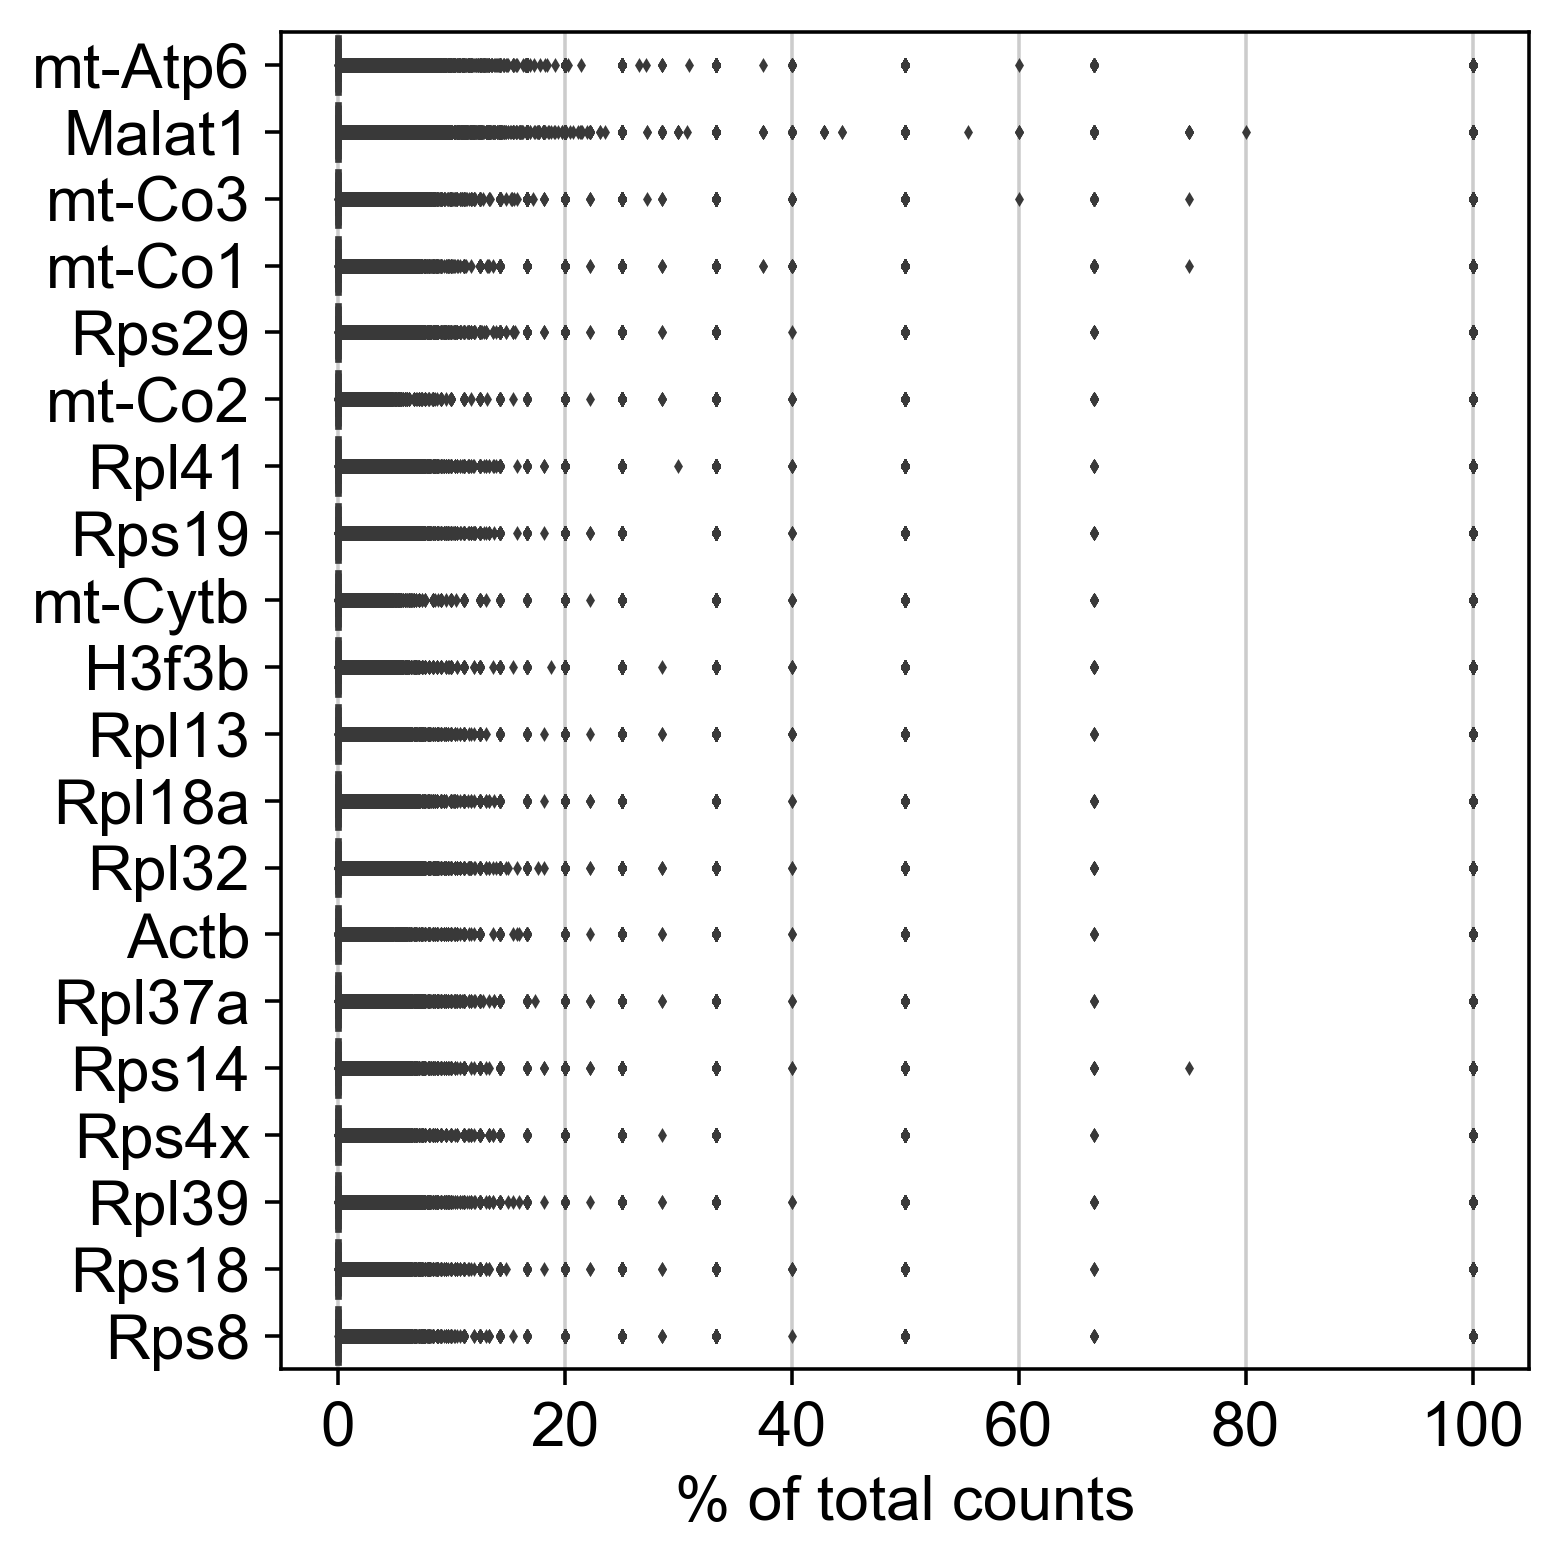

In [15]:
sc.pl.highest_expr_genes(sample_object, n_top=20)

### Intital filtering

- By gene

In [16]:
sc.pp.filter_cells(sample_object, min_genes = 200)
print(sample_object.n_obs, sample_object.n_vars)

filtered out 1464814 cells that have less than 200 genes expressed
9746 27998


- By cell

In [17]:
sc.pp.filter_genes(sample_object, min_cells = 3)
sample_object.shape

filtered out 12153 genes that are detected in less than 3 cells


(9746, 15845)

### QC metrics

In [18]:
sample_object.var['mt'] = sample_object.var_names.str.startswith('mt-')
sample_object.var['ribo'] = sample_object.var_names.str.startswith(("Rps","Rpl"))
sample_object.var["hb"] = sample_object.var_names.str.contains(("^Hb[^(P)]"))
sample_object.var

gene_ids  n_cells     mt   ribo     hb
Sox17           ENSMUSG00000025902        5  False  False  False
Mrpl15          ENSMUSG00000033845     4772  False  False  False
Lypla1          ENSMUSG00000025903     2817  False  False  False
Tcea1           ENSMUSG00000033813     4816  False  False  False
Atp6v1h         ENSMUSG00000033793     2893  False  False  False
...                            ...      ...    ...    ...    ...
AC125149.2      ENSMUSG00000079794       12  False  False  False
AC168977.1      ENSMUSG00000079808       60  False  False  False
PISD            ENSMUSG00000095041     6000  False  False  False
DHRSX           ENSMUSG00000063897     1766  False  False  False
CAAA01147332.1  ENSMUSG00000095742      217  False  False  False

[15845 rows x 5 columns]

In [19]:
sample_object.var['mt'].value_counts()

mt
False    15832
True        13
Name: count, dtype: int64

In [20]:
sample_object.var['ribo'].value_counts()

ribo
False    15734
True       111
Name: count, dtype: int64

In [21]:
sample_object.var['hb'].value_counts()

hb
False    15838
True         7
Name: count, dtype: int64

In [22]:
sc.pp.calculate_qc_metrics(sample_object, qc_vars = ['mt', 'ribo', 'hb'], percent_top = None, log1p = False, inplace = True)

In [23]:
sample_object.obs

experiment  n_genes  n_genes_by_counts  total_counts  \
AAACCTGAGAACAATC-1-PBS        PBS     4004               4003       15616.0   
AAACCTGAGACCTTTG-1-PBS        PBS      338                338         501.0   
AAACCTGAGCTAGTCT-1-PBS        PBS      635                635        1121.0   
AAACCTGAGTACGTAA-1-PBS        PBS     2073               2073        5466.0   
AAACCTGCAAGGTGTG-1-PBS        PBS     2418               2418        7798.0   
...                           ...      ...                ...           ...   
TTTGTCAAGGCCCGTT-1-BCG        BCG     3076               3076        9902.0   
TTTGTCAAGTTGTCGT-1-BCG        BCG      324                324         731.0   
TTTGTCAGTAGGCTGA-1-BCG        BCG      505                505         916.0   
TTTGTCAGTCTCACCT-1-BCG        BCG      345                345         522.0   
TTTGTCATCTCTGTCG-1-BCG        BCG     3968               3966       17964.0   

                        total_counts_mt  pct_counts_mt  total_counts_ribo  \
AAACCTGAGAACAATC-1-PBS            389.0       2.491035             4548.0   
AAACCTGAGACCTTTG-1-PBS             17.0       3.393214              137.0   
AAACCTGAGCTAGTCT-1-PBS            162.0      14.451383              123.0   
AAACCTGAGTACGTAA-1-PBS            219.0       4.006586             1655.0   
AAACCTGCAAGGTGTG-1-PBS            277.0       3.552193             2760.0   
...                                 ...            ...                ...   
TTTGTCAAGGCCCGTT-1-BCG            268.0       2.706524             3088.0   
TTTGTCAAGTTGTCGT-1-BCG            299.0      40.902874               78.0   
TTTGTCAGTAGGCTGA-1-BCG            280.0      30.567684               83.0   
TTTGTCAGTCTCACCT-1-BCG              4.0       0.766284              198.0   
TTTGTCATCTCTGTCG-1-BCG            467.0       2.599644             6092.0   

                        pct_counts_ribo  total_counts_hb  pct_counts_hb  
AAACCTGAGAACAATC-1-PBS        29.123978              3.0       0.019211  
AAACCTGAGACCTTTG-1-PBS        27.345308              0.0       0.000000  
AAACCTGAGCTAGTCT-1-PBS        10.972346              1.0       0.089206  
AAACCTGAGTACGTAA-1-PBS        30.278084              0.0       0.000000  
AAACCTGCAAGGTGTG-1-PBS        35.393692              1.0       0.012824  
...                                 ...              ...            ...  
TTTGTCAAGGCCCGTT-1-BCG        31.185617              0.0       0.000000  
TTTGTCAAGTTGTCGT-1-BCG        10.670315              0.0       0.000000  
TTTGTCAGTAGGCTGA-1-BCG         9.061135              0.0       0.000000  
TTTGTCAGTCTCACCT-1-BCG        37.931034              0.0       0.000000  
TTTGTCATCTCTGTCG-1-BCG        33.912270              1.0       0.005567  

[9746 rows x 10 columns]

- QC visualisation

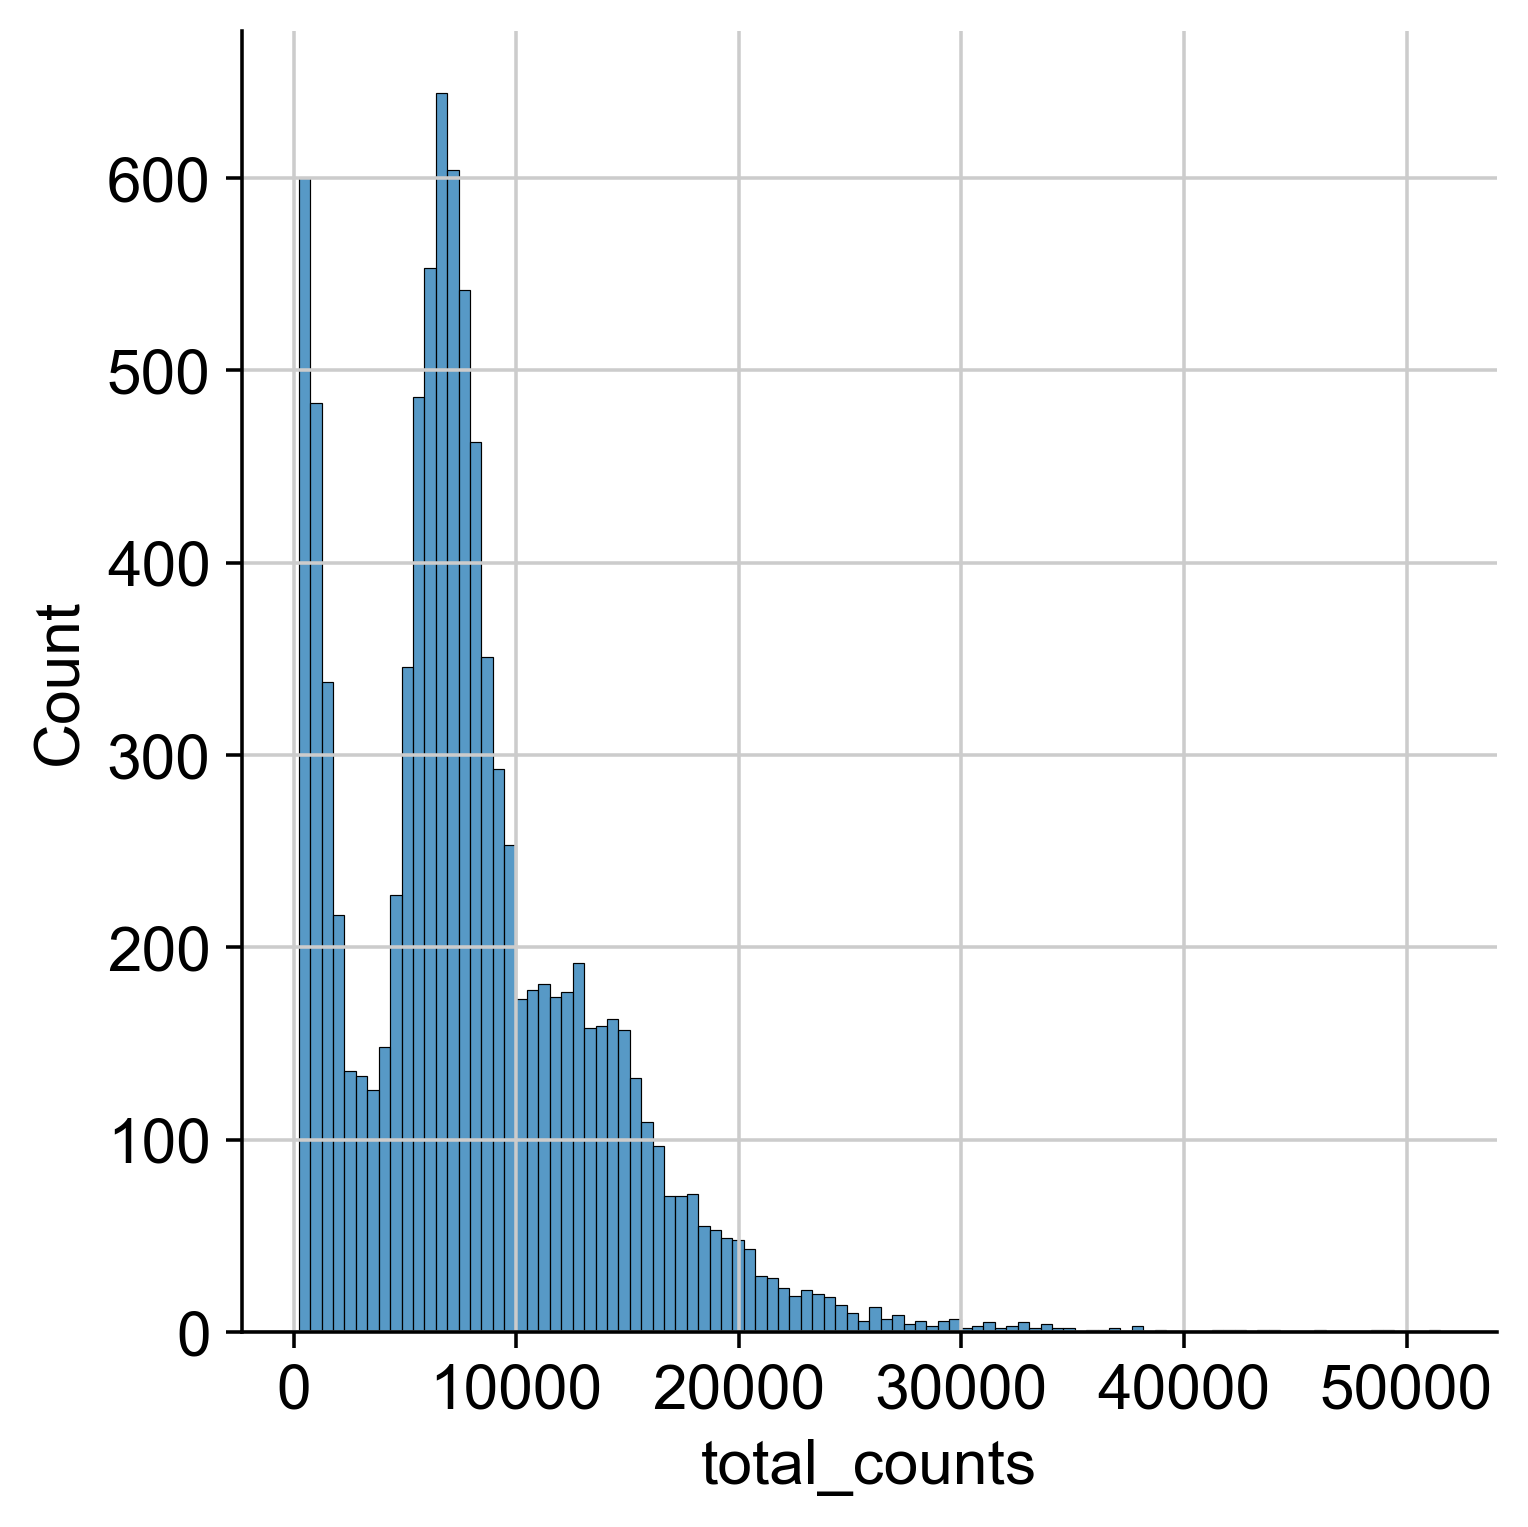

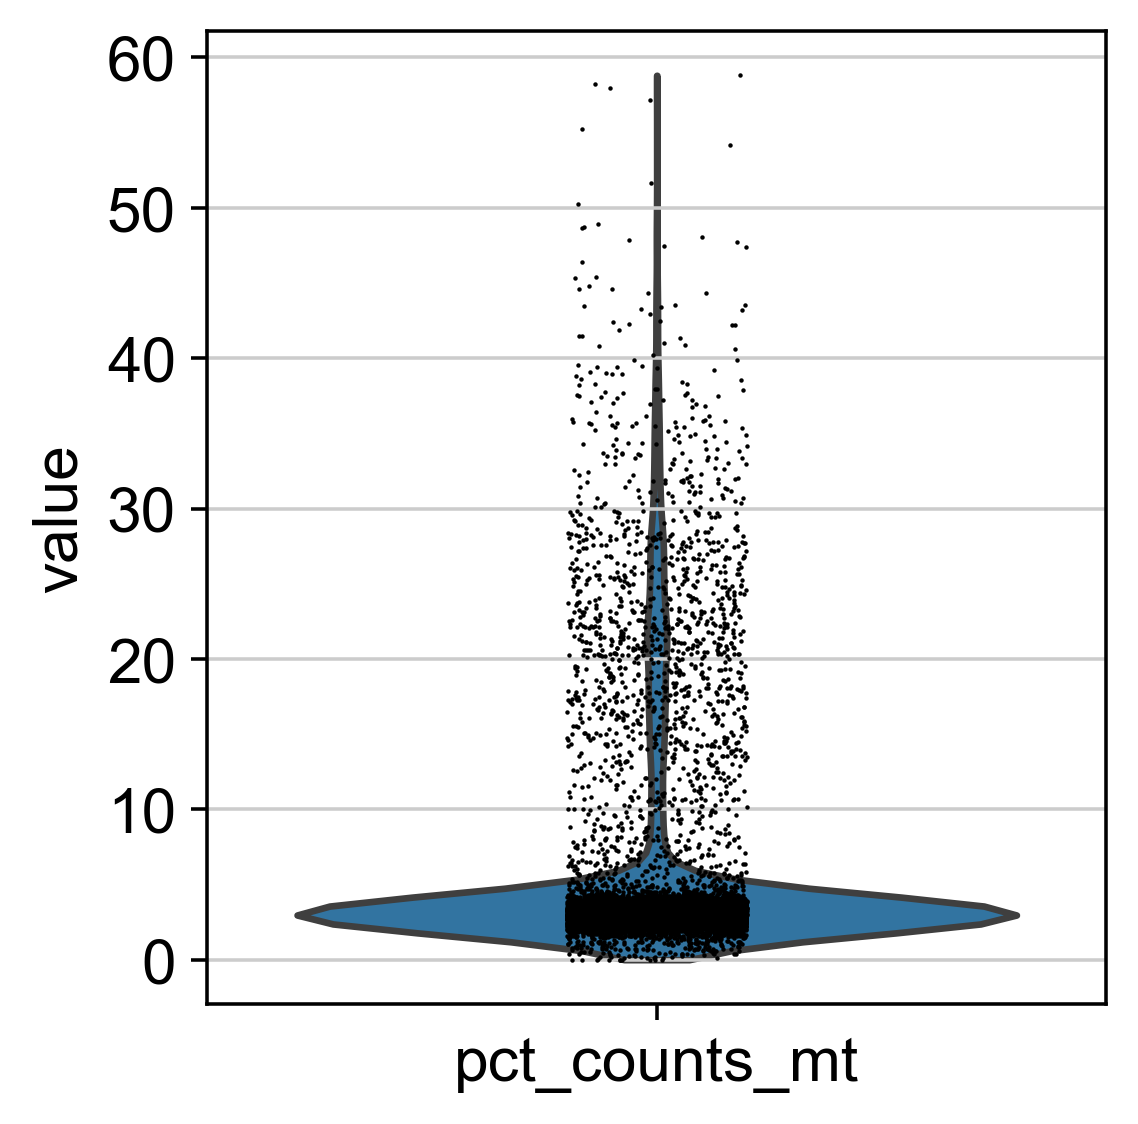

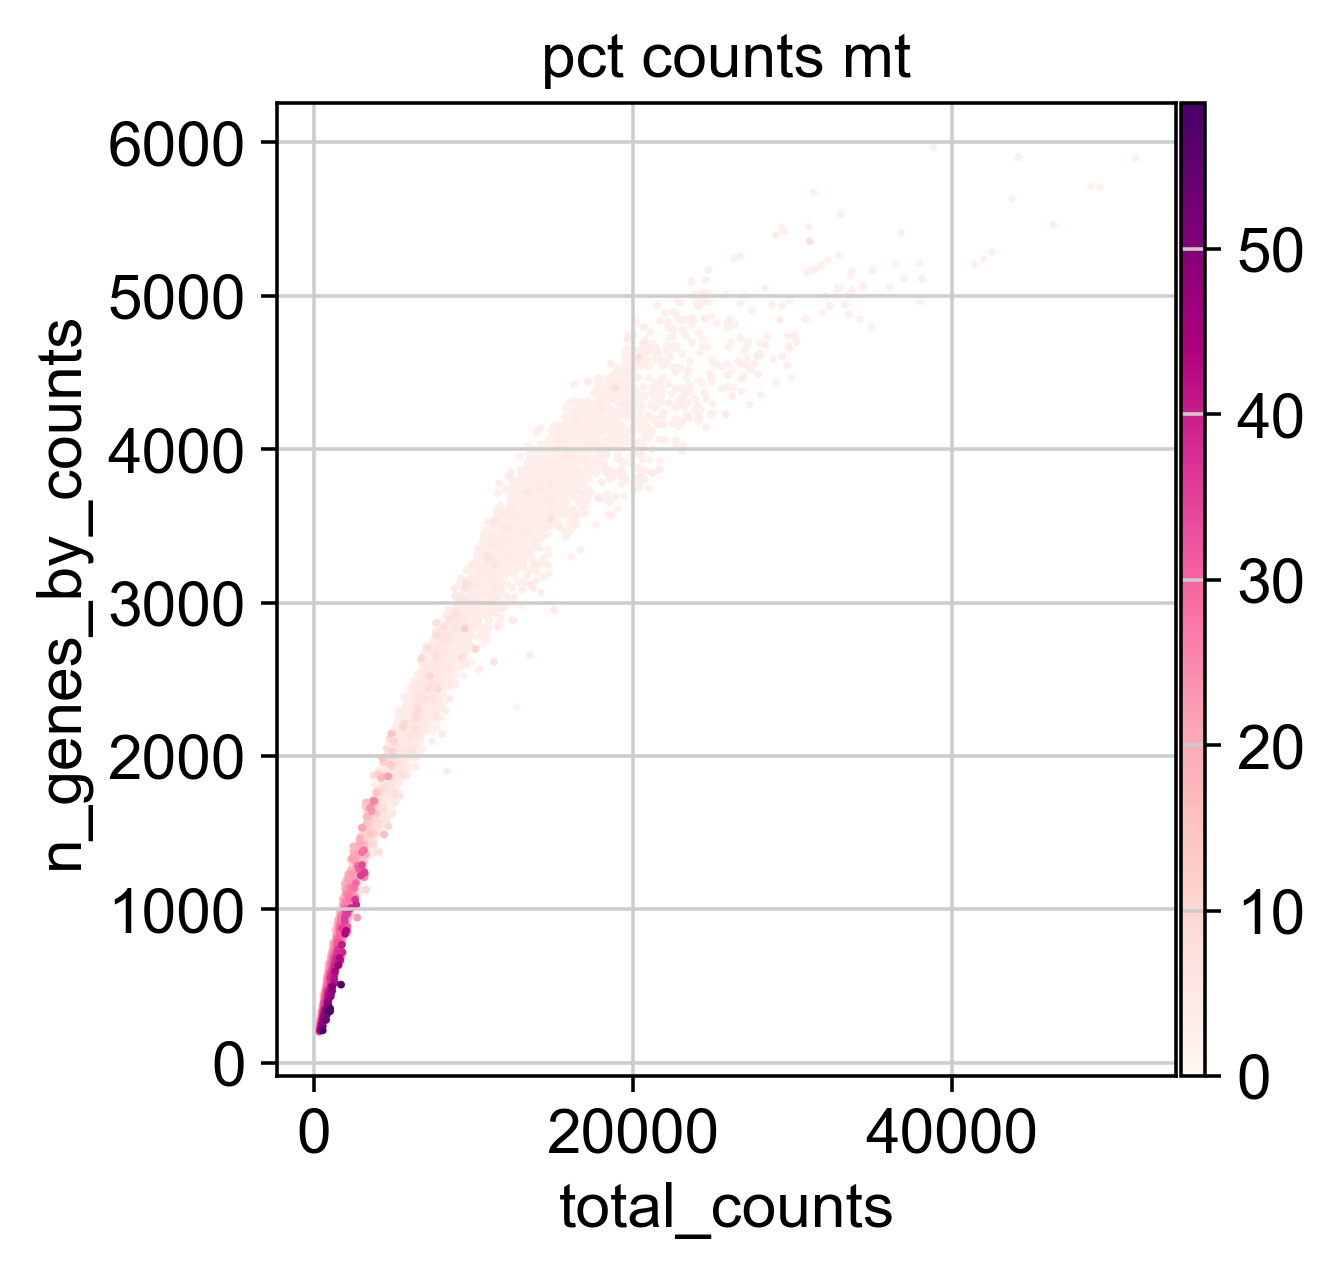

In [24]:
p1 = sns.displot(sample_object.obs["total_counts"], bins=100, kde=False)
# sc.pl.violin(adata, 'total_counts')
p2 = sc.pl.violin(sample_object, "pct_counts_mt")
p3 = sc.pl.scatter(sample_object, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

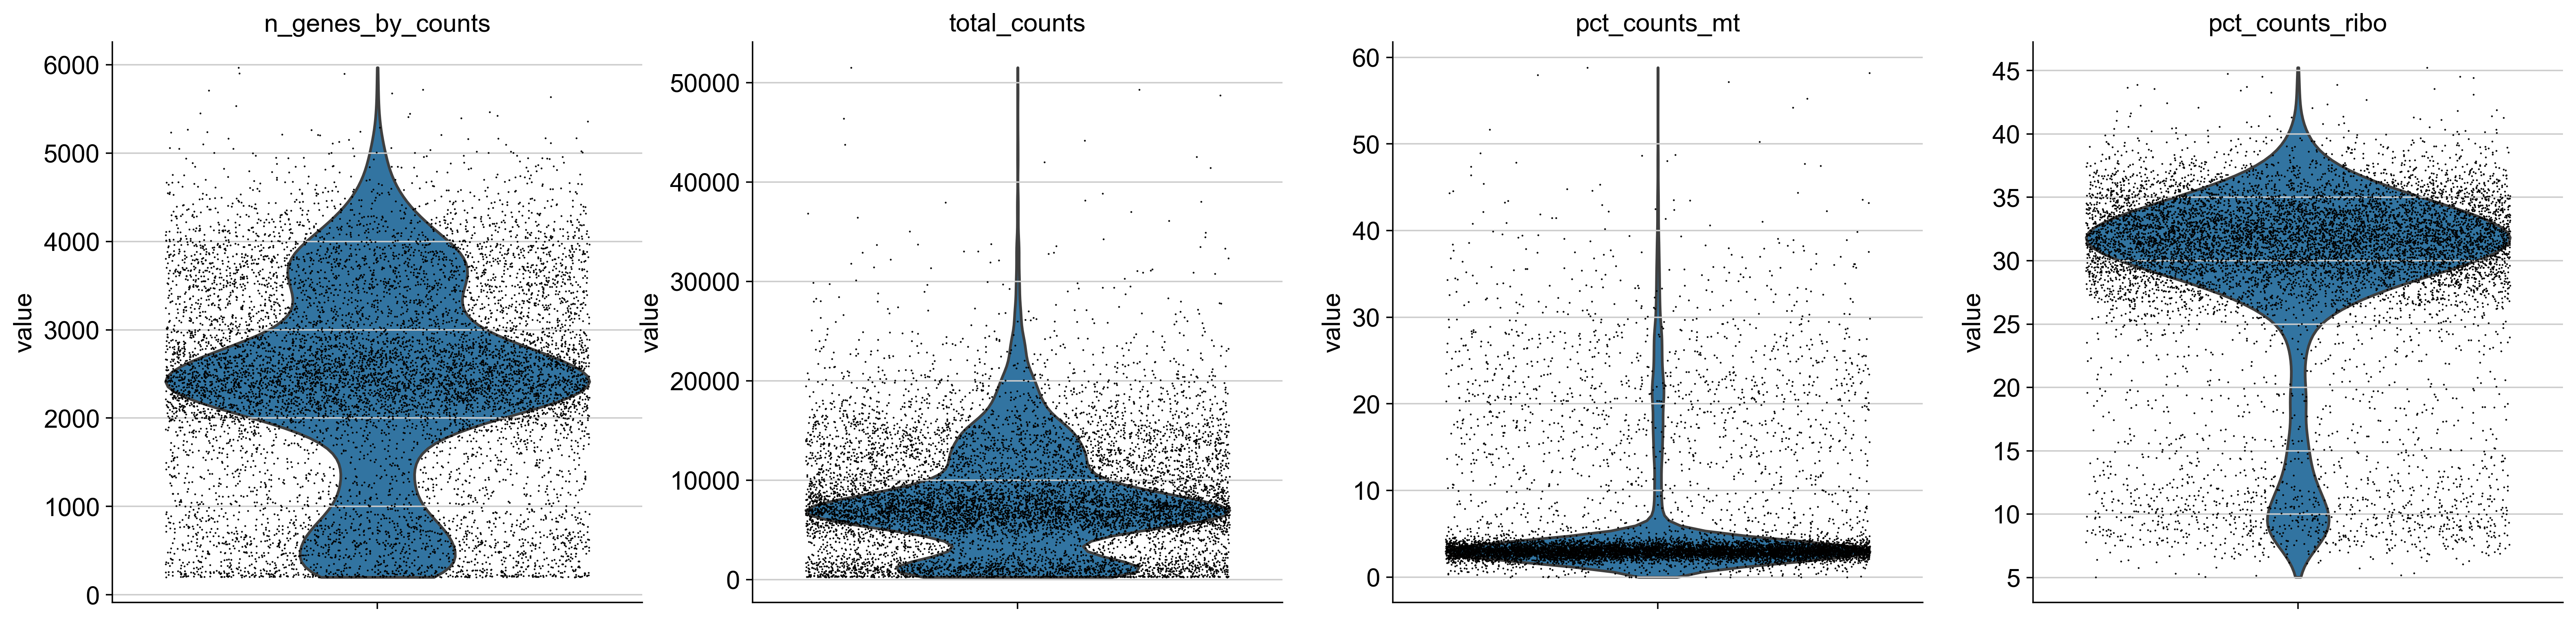

In [25]:
sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'],
             jitter=0.4, multi_panel=True)

In [26]:
sample_object

AnnData object with n_obs × n_vars = 9746 × 15845
    obs: 'experiment', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb'
    var: 'gene_ids', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

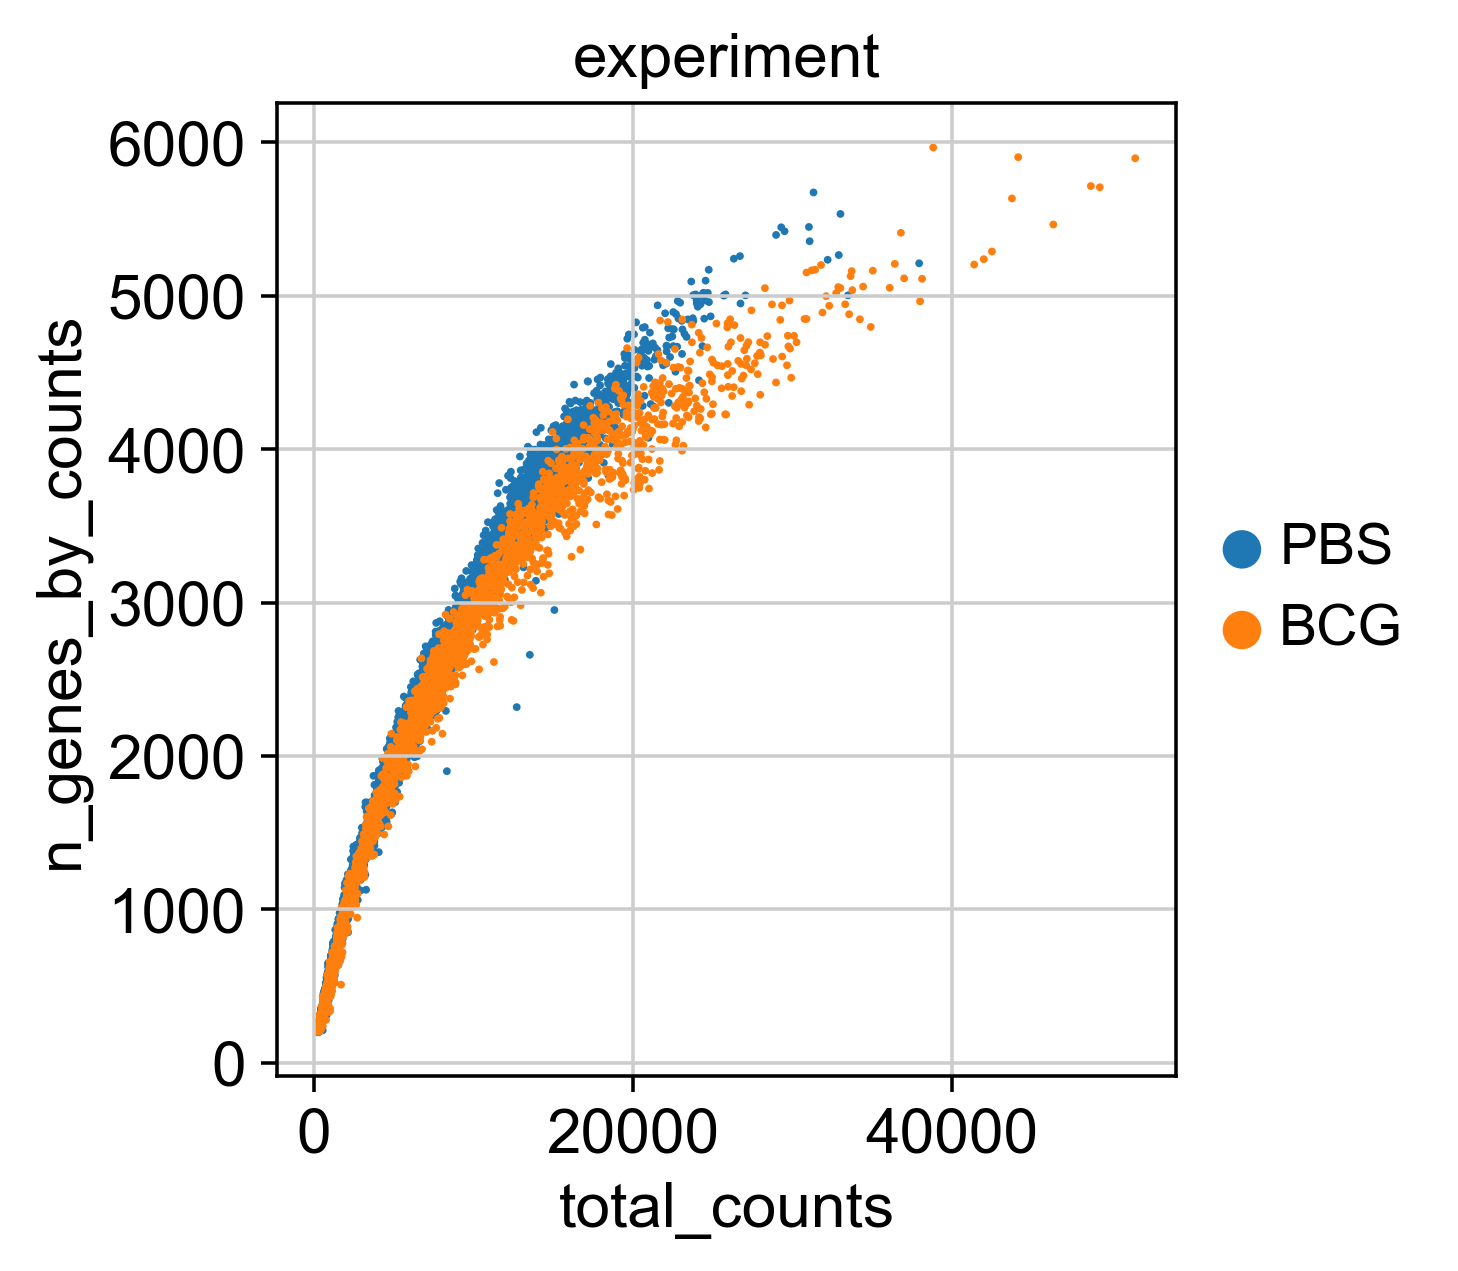

In [27]:
sc.pl.scatter(sample_object, x='total_counts', y='n_genes_by_counts', color = "experiment")

### QC-based filtering

In [28]:
sample_object.obs.head()

experiment  n_genes  n_genes_by_counts  total_counts  \
AAACCTGAGAACAATC-1-PBS        PBS     4004               4003       15616.0   
AAACCTGAGACCTTTG-1-PBS        PBS      338                338         501.0   
AAACCTGAGCTAGTCT-1-PBS        PBS      635                635        1121.0   
AAACCTGAGTACGTAA-1-PBS        PBS     2073               2073        5466.0   
AAACCTGCAAGGTGTG-1-PBS        PBS     2418               2418        7798.0   

                        total_counts_mt  pct_counts_mt  total_counts_ribo  \
AAACCTGAGAACAATC-1-PBS            389.0       2.491035             4548.0   
AAACCTGAGACCTTTG-1-PBS             17.0       3.393214              137.0   
AAACCTGAGCTAGTCT-1-PBS            162.0      14.451383              123.0   
AAACCTGAGTACGTAA-1-PBS            219.0       4.006586             1655.0   
AAACCTGCAAGGTGTG-1-PBS            277.0       3.552193             2760.0   

                        pct_counts_ribo  total_counts_hb  pct_counts_hb  
AAACCTGAGAACAATC-1-PBS        29.123978              3.0       0.019211  
AAACCTGAGACCTTTG-1-PBS        27.345308              0.0       0.000000  
AAACCTGAGCTAGTCT-1-PBS        10.972346              1.0       0.089206  
AAACCTGAGTACGTAA-1-PBS        30.278084              0.0       0.000000  
AAACCTGCAAGGTGTG-1-PBS        35.393692              1.0       0.012824

In [29]:
sample_object.shape

(9746, 15845)

In [30]:
sample_object.obs["mt_ok"] = sample_object.obs['pct_counts_mt'] <= 20
sample_object.obs.head()


experiment  n_genes  n_genes_by_counts  total_counts  \
AAACCTGAGAACAATC-1-PBS        PBS     4004               4003       15616.0   
AAACCTGAGACCTTTG-1-PBS        PBS      338                338         501.0   
AAACCTGAGCTAGTCT-1-PBS        PBS      635                635        1121.0   
AAACCTGAGTACGTAA-1-PBS        PBS     2073               2073        5466.0   
AAACCTGCAAGGTGTG-1-PBS        PBS     2418               2418        7798.0   

                        total_counts_mt  pct_counts_mt  total_counts_ribo  \
AAACCTGAGAACAATC-1-PBS            389.0       2.491035             4548.0   
AAACCTGAGACCTTTG-1-PBS             17.0       3.393214              137.0   
AAACCTGAGCTAGTCT-1-PBS            162.0      14.451383              123.0   
AAACCTGAGTACGTAA-1-PBS            219.0       4.006586             1655.0   
AAACCTGCAAGGTGTG-1-PBS            277.0       3.552193             2760.0   

                        pct_counts_ribo  total_counts_hb  pct_counts_hb  mt_ok  
AAACCTGAGAACAATC-1-PBS        29.123978              3.0       0.019211   True  
AAACCTGAGACCTTTG-1-PBS        27.345308              0.0       0.000000   True  
AAACCTGAGCTAGTCT-1-PBS        10.972346              1.0       0.089206   True  
AAACCTGAGTACGTAA-1-PBS        30.278084              0.0       0.000000   True  
AAACCTGCAAGGTGTG-1-PBS        35.393692              1.0       0.012824   True

In [31]:
sample_object.obs.mt_ok.value_counts()

mt_ok
True     9003
False     743
Name: count, dtype: int64

In [32]:
print(f"Total number of cells: {sample_object.n_obs}")
sample_object = sample_object[(sample_object.obs.mt_ok)].copy()

print(f"Number of cells after filtering of low quality cells: {sample_object.n_obs}")

Total number of cells: 9746
Number of cells after filtering of low quality cells: 9003


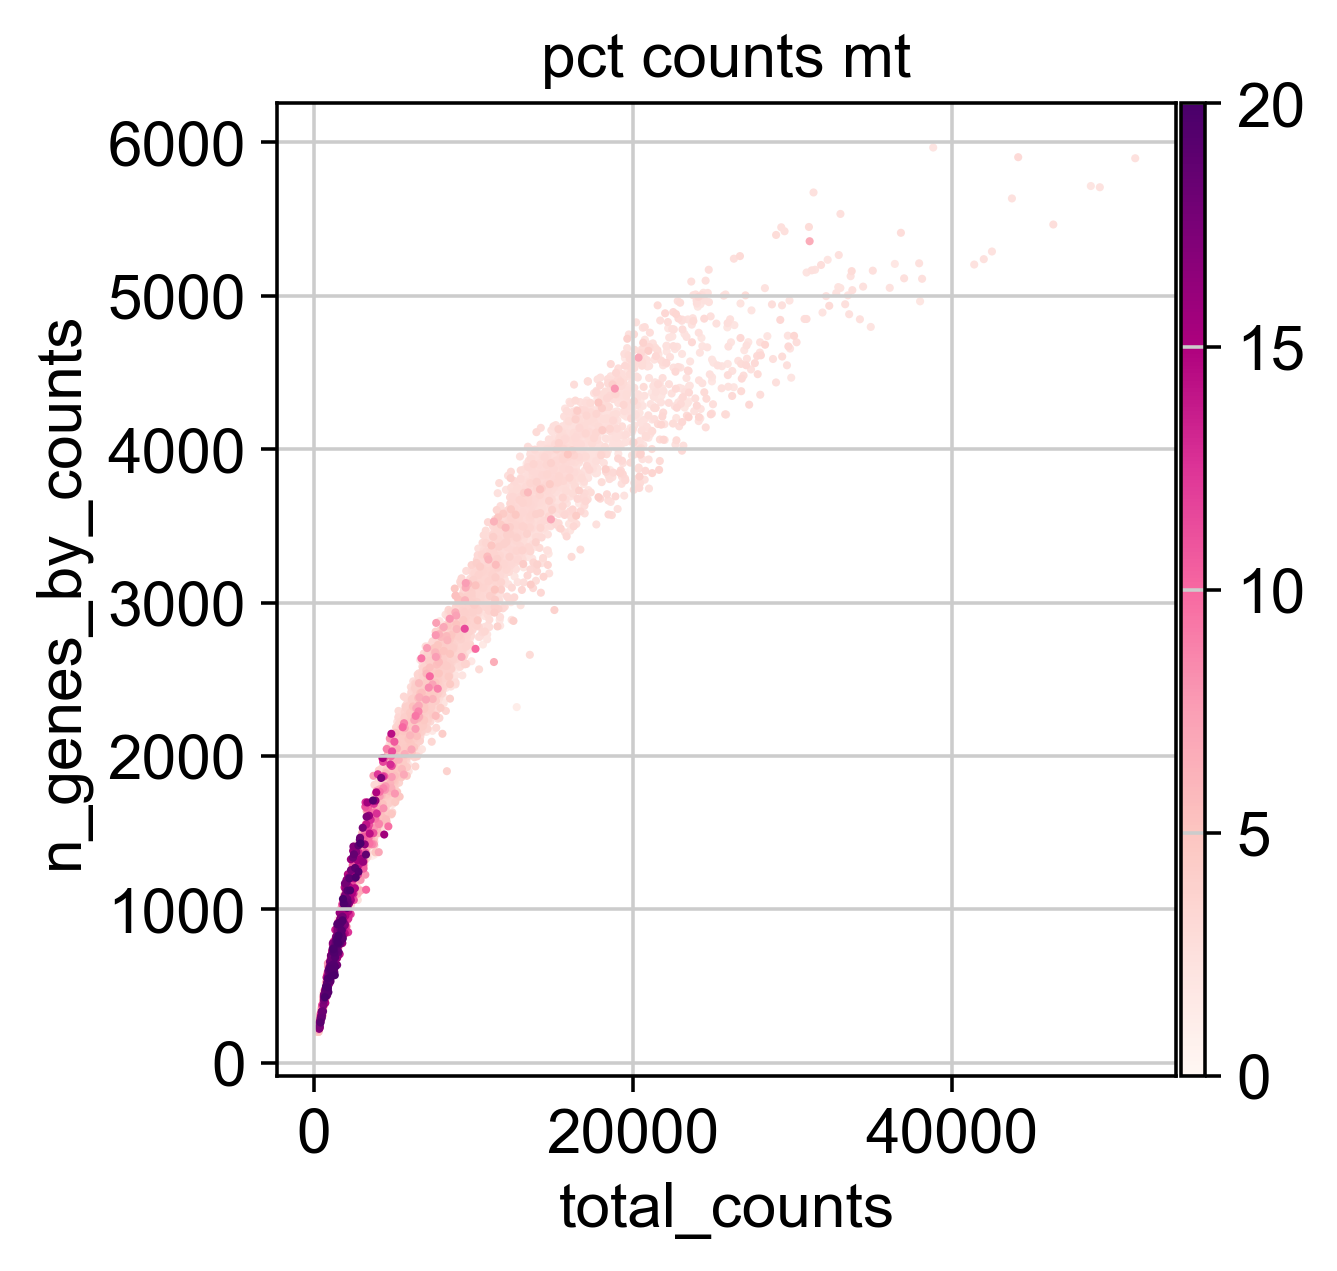

In [33]:
p1 = sc.pl.scatter(sample_object, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

### Add sample sex covariate

In [34]:
annot = sc.queries.biomart_annotations(
        "mmusculus",
        ["ensembl_gene_id", "external_gene_name", "start_position", "end_position", "chromosome_name"],
    ).set_index("external_gene_name")

In [35]:
annot.head()

ensembl_gene_id  start_position  end_position  \
external_gene_name                                                     
mt-Tf               ENSMUSG00000064336               1            68   
mt-Rnr1             ENSMUSG00000064337              70          1024   
mt-Tv               ENSMUSG00000064338            1025          1093   
mt-Rnr2             ENSMUSG00000064339            1094          2675   
mt-Tl1              ENSMUSG00000064340            2676          2750   

                   chromosome_name  
external_gene_name                  
mt-Tf                           MT  
mt-Rnr1                         MT  
mt-Tv                           MT  
mt-Rnr2                         MT  
mt-Tl1                          MT

- Y chrom

In [36]:
chrY_genes = sample_object.var_names.intersection(annot.index[annot.chromosome_name == "Y"])
chrY_genes

Index(['Kdm5d', 'Eif2s3y', 'Gm29650', 'Uty', 'Ddx3y'], dtype='object')

In [37]:
sample_object.obs['percent_chrY'] = np.sum(
    sample_object[:, chrY_genes].X, axis = 1).A1 / np.sum(sample_object.X, axis = 1).A1 * 100

- X chrom

In [38]:
chrX_genes = sample_object.var_names.intersection(annot.index[annot.chromosome_name == "X"])
chrX_genes

Index(['Nudt11', 'Nudt10', 'Shroom4', 'Dgkk', 'Clcn5', 'Usp27x', 'Ppp1r3f',
       'Foxp3', 'Ccdc22', 'Cacna1f',
       ...
       'Tlr7', 'Prps2', 'Msl3', 'Arhgap6', 'Gm15261', 'Amelx', 'Hccs', 'Mid1',
       'Gm15726', 'Gm15247'],
      dtype='object', length=484)

In [39]:
chrX_sum = sample_object[:, chrX_genes].X.sum(axis=1)
total_sum = sample_object.X.sum(axis=1)

# Flatten the arrays and calculate percent_chrY
sample_object.obs['percent_chrX'] = (np.asarray(chrX_sum).flatten() / np.asarray(total_sum).flatten()) * 100
sample_object.obs

experiment  n_genes  n_genes_by_counts  total_counts  \
AAACCTGAGAACAATC-1-PBS        PBS     4004               4003       15616.0   
AAACCTGAGACCTTTG-1-PBS        PBS      338                338         501.0   
AAACCTGAGCTAGTCT-1-PBS        PBS      635                635        1121.0   
AAACCTGAGTACGTAA-1-PBS        PBS     2073               2073        5466.0   
AAACCTGCAAGGTGTG-1-PBS        PBS     2418               2418        7798.0   
...                           ...      ...                ...           ...   
TTTGGTTAGGGCTTGA-1-BCG        BCG     2152               2152        5754.0   
TTTGGTTCATTGGGCC-1-BCG        BCG      364                364         596.0   
TTTGTCAAGGCCCGTT-1-BCG        BCG     3076               3076        9902.0   
TTTGTCAGTCTCACCT-1-BCG        BCG      345                345         522.0   
TTTGTCATCTCTGTCG-1-BCG        BCG     3968               3966       17964.0   

                        total_counts_mt  pct_counts_mt  total_counts_ribo  \
AAACCTGAGAACAATC-1-PBS            389.0       2.491035             4548.0   
AAACCTGAGACCTTTG-1-PBS             17.0       3.393214              137.0   
AAACCTGAGCTAGTCT-1-PBS            162.0      14.451383              123.0   
AAACCTGAGTACGTAA-1-PBS            219.0       4.006586             1655.0   
AAACCTGCAAGGTGTG-1-PBS            277.0       3.552193             2760.0   
...                                 ...            ...                ...   
TTTGGTTAGGGCTTGA-1-BCG            199.0       3.458464             1747.0   
TTTGGTTCATTGGGCC-1-BCG             44.0       7.382550              166.0   
TTTGTCAAGGCCCGTT-1-BCG            268.0       2.706524             3088.0   
TTTGTCAGTCTCACCT-1-BCG              4.0       0.766284              198.0   
TTTGTCATCTCTGTCG-1-BCG            467.0       2.599644             6092.0   

                        pct_counts_ribo  total_counts_hb  pct_counts_hb  \
AAACCTGAGAACAATC-1-PBS        29.123978              3.0       0.019211   
AAACCTGAGACCTTTG-1-PBS        27.345308              0.0       0.000000   
AAACCTGAGCTAGTCT-1-PBS        10.972346              1.0       0.089206   
AAACCTGAGTACGTAA-1-PBS        30.278084              0.0       0.000000   
AAACCTGCAAGGTGTG-1-PBS        35.393692              1.0       0.012824   
...                                 ...              ...            ...   
TTTGGTTAGGGCTTGA-1-BCG        30.361488              0.0       0.000000   
TTTGGTTCATTGGGCC-1-BCG        27.852350              0.0       0.000000   
TTTGTCAAGGCCCGTT-1-BCG        31.185617              0.0       0.000000   
TTTGTCAGTCTCACCT-1-BCG        37.931034              0.0       0.000000   
TTTGTCATCTCTGTCG-1-BCG        33.912270              1.0       0.005567   

                        mt_ok  percent_chrY  percent_chrX  
AAACCTGAGAACAATC-1-PBS   True      0.000000      3.425973  
AAACCTGAGACCTTTG-1-PBS   True      0.000000      2.794411  
AAACCTGAGCTAGTCT-1-PBS   True      0.089206      1.605709  
AAACCTGAGTACGTAA-1-PBS   True      0.018295      3.073545  
AAACCTGCAAGGTGTG-1-PBS   True      0.025648      3.552193  
...                       ...           ...           ...  
TTTGGTTAGGGCTTGA-1-BCG   True      0.000000      3.302051  
TTTGGTTCATTGGGCC-1-BCG   True      0.000000      2.348993  
TTTGTCAAGGCCCGTT-1-BCG   True      0.010099      3.645728  
TTTGTCAGTCTCACCT-1-BCG   True      0.000000      3.831418  
TTTGTCATCTCTGTCG-1-BCG   True      0.000000      4.152750  

[9003 rows x 13 columns]

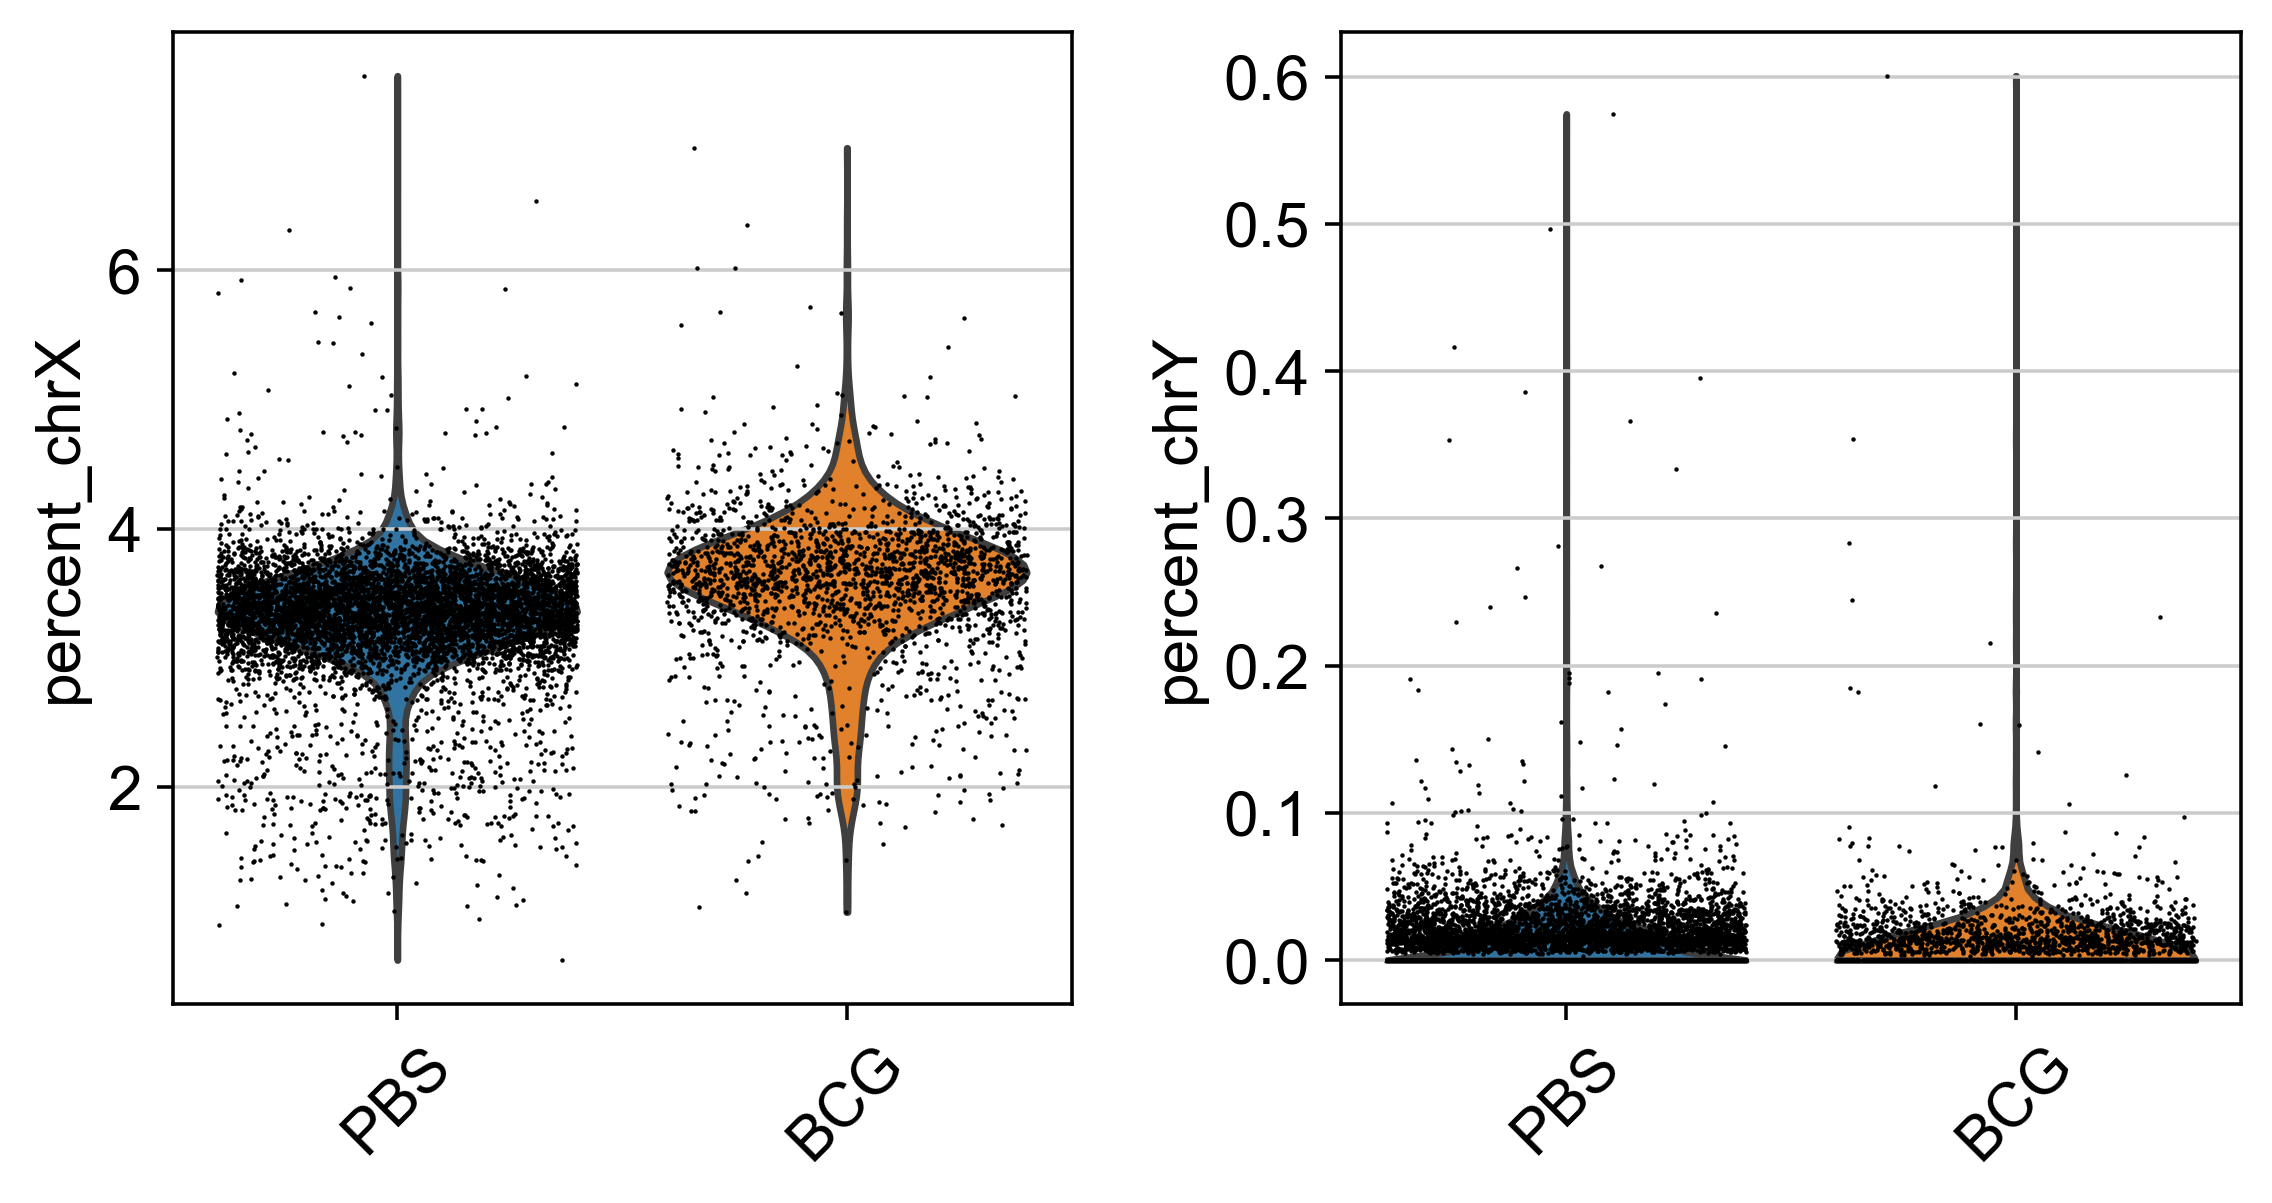

In [40]:
sc.pl.violin(sample_object, ["percent_chrX", "percent_chrY"], jitter = 0.4, groupby = 'experiment', rotation = 45)

### Cell cycle scores

In [41]:
!if [ ! -f /Users/mairi.mcclean/data/qc_files/mus_musculus_cell_cycle_list.txt ]; then curl -o /Users/mairi.mcclean/data/qc_files/mus_musculus_cell_cycle_list.txt https://raw.githubusercontent.com/hbc/tinyatlas/master/cell_cycle/Mus_musculus.csv

zsh:1: parse error near `https://raw.githubus...'


In [42]:
cell_cycle_genes = [x.strip() for x in open('/Users/mairi.mcclean/data/qc_files/mus_musculus_cell_cycle_list.txt')]
print(len(cell_cycle_genes))

# Split into 2 lists
g2m_genes = cell_cycle_genes[:54]
s_genes = cell_cycle_genes[54:]

cell_cycle_genes = [x for x in cell_cycle_genes if x in sample_object.var_names]
print(len(cell_cycle_genes))

97
96


In [43]:
# create other anndata object for score calculation

adata_log = anndata.AnnData(X = sample_object.X,  var = sample_object.var, obs = sample_object.obs)
sc.pp.normalize_total(adata_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_log)

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['Jchain', 'Actb', 'Hbb-bs', 'Hba-a1', 'Hba-a2', 'Malat1', 'mt-Co1', 'mt-Atp6', 'mt-Co3']
    finished (0:00:00)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    515 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    643 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


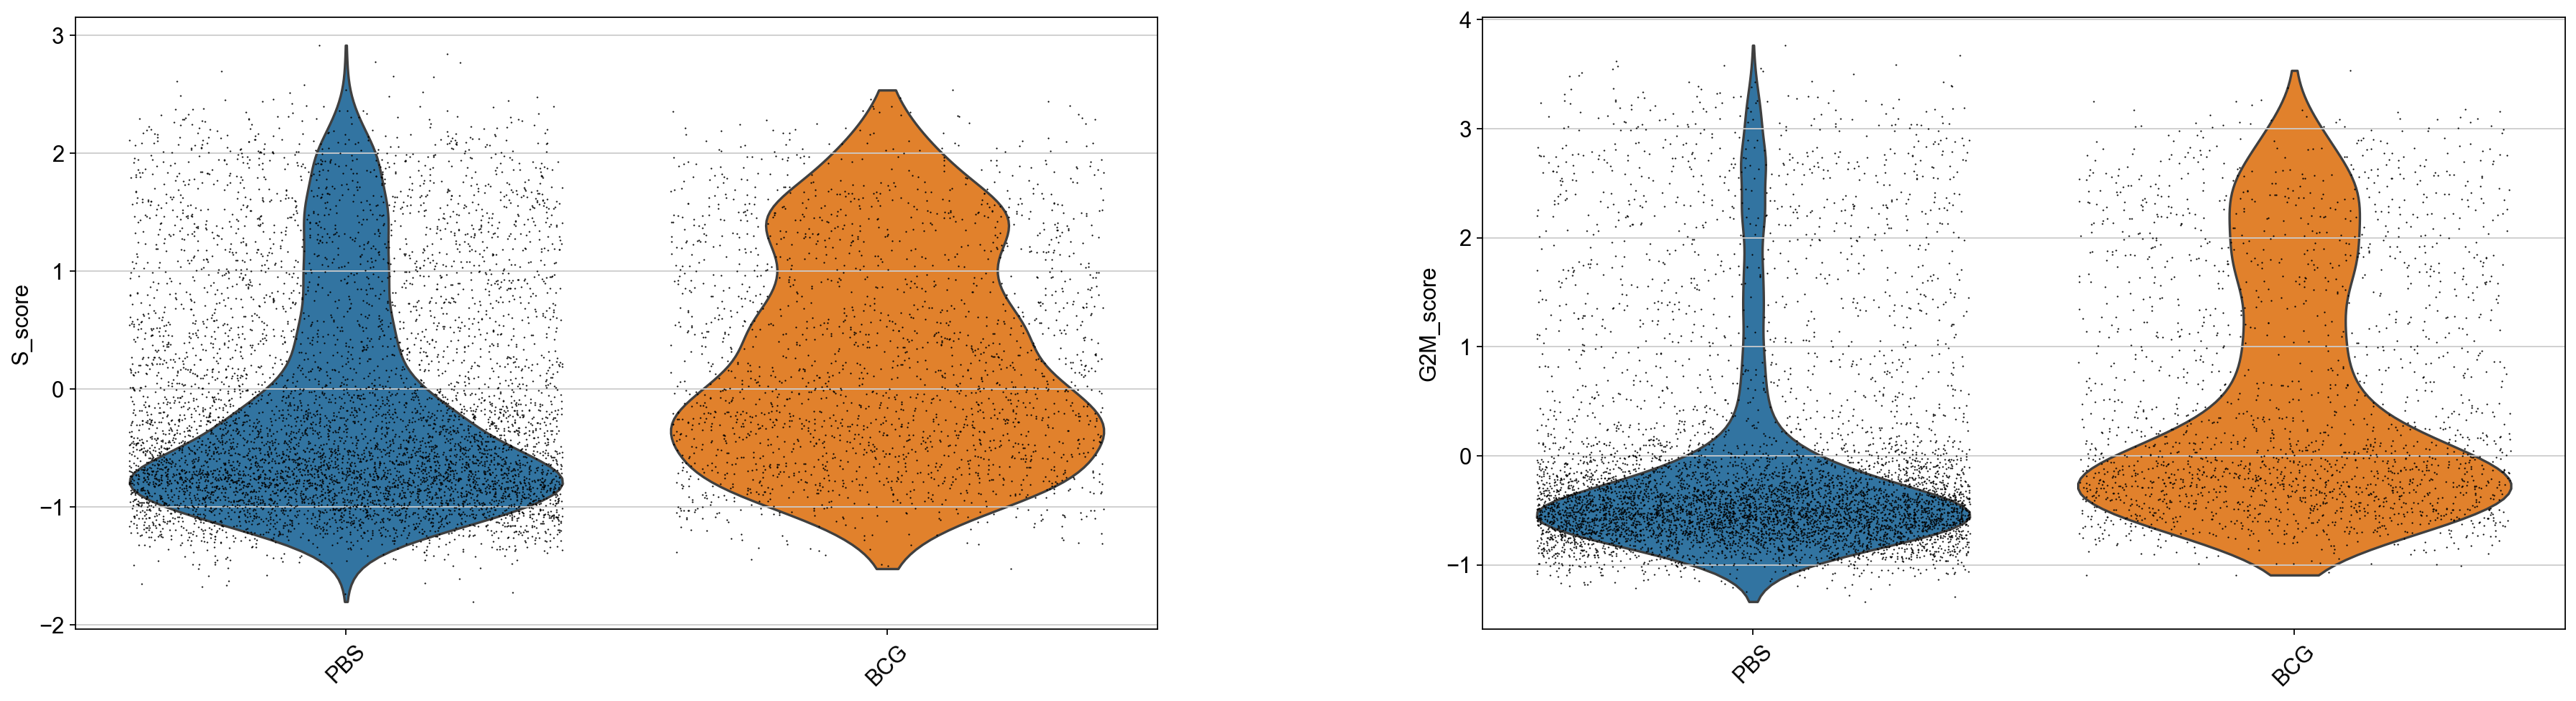

In [44]:
# Set specific figure params
sc.set_figure_params(figsize=(10, 7))

sc.tl.score_genes_cell_cycle(adata_log, s_genes = s_genes, g2m_genes = g2m_genes)
sc.pl.violin(adata_log, ['S_score', 'G2M_score'],
             jitter = 0.4, groupby = 'experiment', rotation = 45)

In [45]:
sample_object.obs['S_score'] = adata_log.obs['S_score']
sample_object.obs['G2M_score'] = adata_log.obs['G2M_score']
sample_object

AnnData object with n_obs × n_vars = 9003 × 15845
    obs: 'experiment', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'mt_ok', 'percent_chrY', 'percent_chrX', 'S_score', 'G2M_score'
    var: 'gene_ids', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'experiment_colors'

### Predict doublets

In [46]:
import scrublet

In [47]:
scrub = scrublet.Scrublet(sample_object.X)

Preprocessing...


/Users/mairi.mcclean/mambaforge/envs/new_scanpy_local/lib/python3.9/site-packages/scrublet/helper_functions.py:254: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.76
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 9.5%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 1.2%
Elapsed time: 6.5 seconds


(<Figure size 640x240 with 2 Axes>,
 array([<Axes: title={'center': 'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <Axes: title={'center': 'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

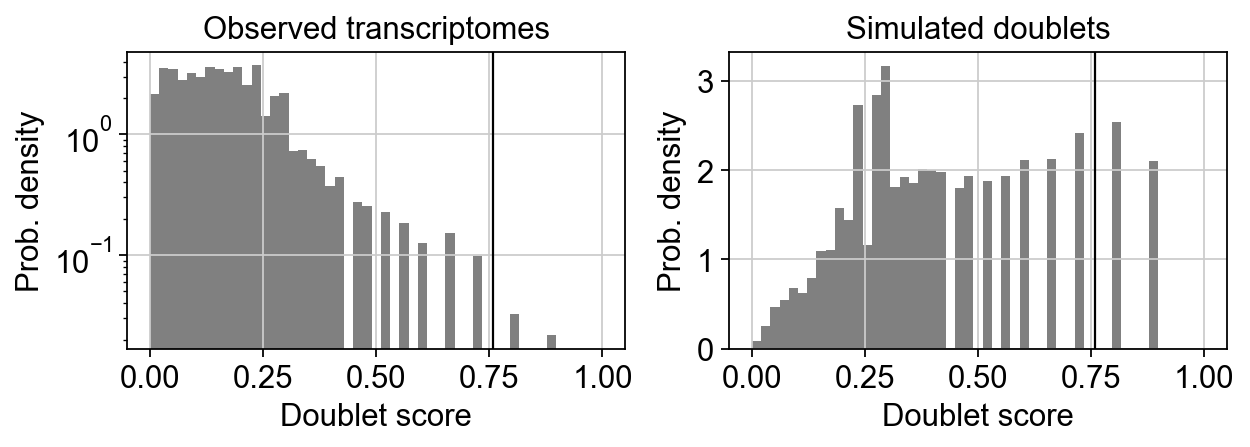

In [48]:
sample_object.obs['doublet_scores'], sample_object.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

In [49]:
sum(sample_object.obs['predicted_doublets'])

10

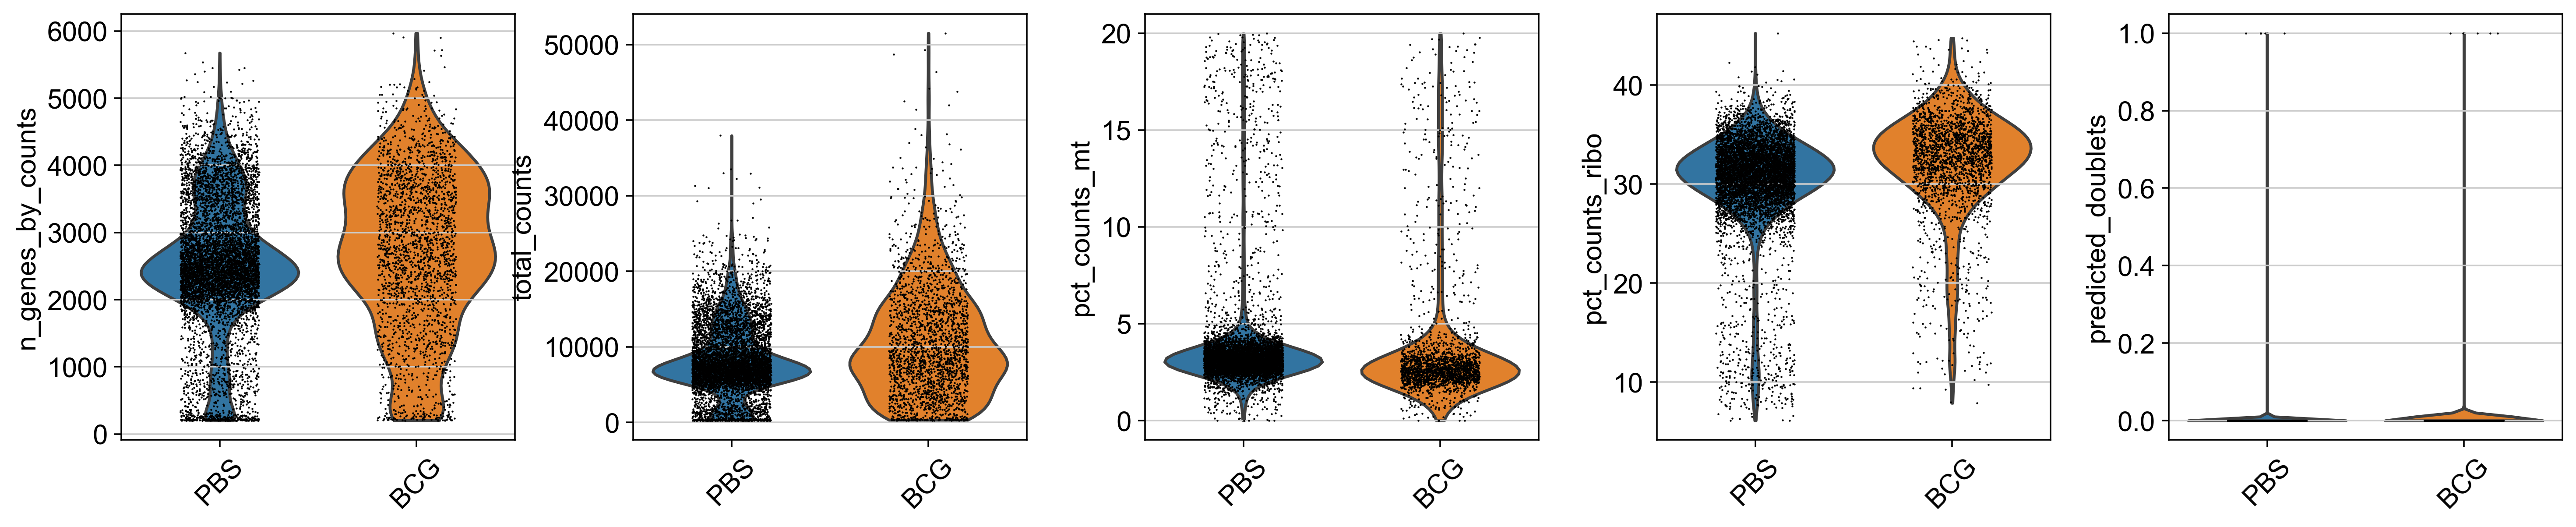

In [50]:
# Re-set figure params
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')

# Plot doublet detection results
sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo', 'predicted_doublets'],
             jitter = 0.2, groupby = 'experiment', rotation = 45, multi_panel=False)

### Prepare counts for individual slots

In [51]:
sample_object.raw = sample_object.copy()
sample_object.layers['counts'] = sample_object.X.copy()
sample_object.layers["sqrt_norm"] = np.sqrt(
    sc.pp.normalize_total(sample_object, inplace = False)["X"]
)
sample_object

normalizing counts per cell
    finished (0:00:00)


AnnData object with n_obs × n_vars = 9003 × 15845
    obs: 'experiment', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'mt_ok', 'percent_chrY', 'percent_chrX', 'S_score', 'G2M_score', 'doublet_scores', 'predicted_doublets'
    var: 'gene_ids', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'experiment_colors'
    layers: 'counts', 'sqrt_norm'

In [55]:
sample_object.uns_keys


<bound method AnnData.uns_keys of AnnData object with n_obs × n_vars = 9003 × 15845
    obs: 'experiment', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'mt_ok', 'percent_chrY', 'percent_chrX', 'S_score', 'G2M_score', 'doublet_scores', 'predicted_doublets'
    var: 'gene_ids', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'experiment_colors'
    layers: 'counts', 'sqrt_norm'>

### Export object

In [54]:
sample_object.write('/Volumes/Lacie/data_lake/Mairi_example/processed_files/abridged_qc/mice/Kaufmann2017_multiomic_BM_mm_230704_qcd.h5ad')